In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import dataset
data = pd.read_csv("imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


##### Data Description:
* Poster_Link = Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year = Year at which that movie released
* Certificate = Certificate earned by that movie
* Runtime = Total runtime of the movie
* Genre = Genre of the movie
* IMDB_Rating = Rating of the movie given by public
* Overview = mini story/ summary
* Meta_score = Given by professional reviewers
* Director = Name of the Director
* Star1,Star2,Star3,Star4 = Name of the Stars
* No_of_votes = Total number of votes
* Gross = Money earned by that movie

### Step 1: Cleaning
Based on the Data Description, Poster_Link and Overview is unnecessary. Therefore, we will drop it.

In [4]:
data_clean = data.drop(columns=['Poster_Link', 'Overview'])

In [5]:
data_clean.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

We can observe that there are missing values. Therefore, we will drop all rows with no information regarding Gross income as we are looking for successful movies. However, we will keep those rows that have no Metascore and Certificate as it is still relevant. 

In [6]:
data_clean['Gross'] = data_clean['Gross'].str.replace(',', '')
data_clean['Gross'] = data_clean['Gross'].replace(np.nan, 0)
data_clean['Gross'] = data_clean['Gross'].astype(int)
data_clean.drop(data_clean[(data_clean['Gross'] == 0)].index, inplace = True)

In [7]:
data_clean.isna().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [8]:
#Check for duplicates.

data_clean.loc[data_clean.duplicated(subset=['Series_Title'])]

# No duplicates found.

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [9]:
# Genre contains up to 3 genre names, thus we will split it.
data_clean[['Genre1','Genre2','Genre3']] = data_clean['Genre'].str.split(pat=',',expand=True)
data_clean = data_clean.drop(columns=['Genre'])
data_clean.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

### Step 2: Exploratory Analysis

In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    object 
 4   IMDB_Rating    831 non-null    float64
 5   Meta_score     750 non-null    float64
 6   Director       831 non-null    object 
 7   Star1          831 non-null    object 
 8   Star2          831 non-null    object 
 9   Star3          831 non-null    object 
 10  Star4          831 non-null    object 
 11  No_of_Votes    831 non-null    int64  
 12  Gross          831 non-null    int32  
 13  Genre1         831 non-null    object 
 14  Genre2         736 non-null    object 
 15  Genre3         542 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 107.1+ KB


### Numerical Variables

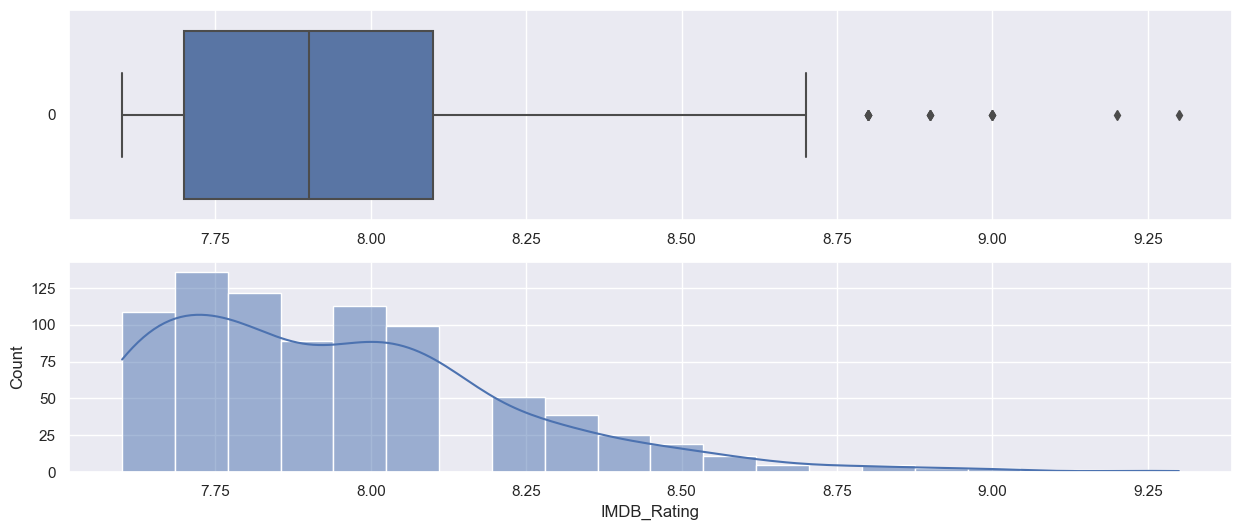

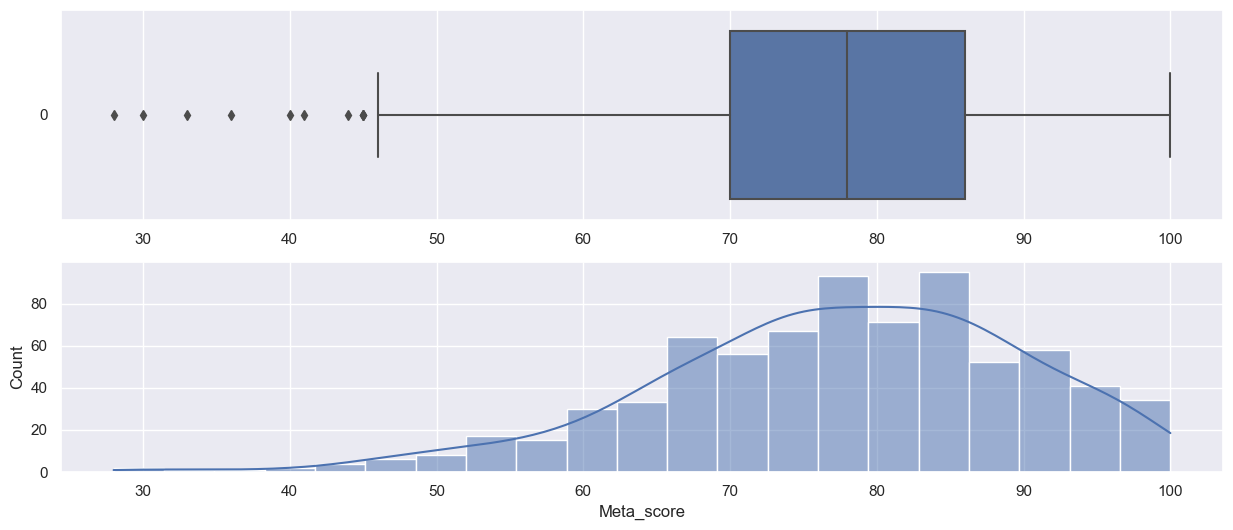

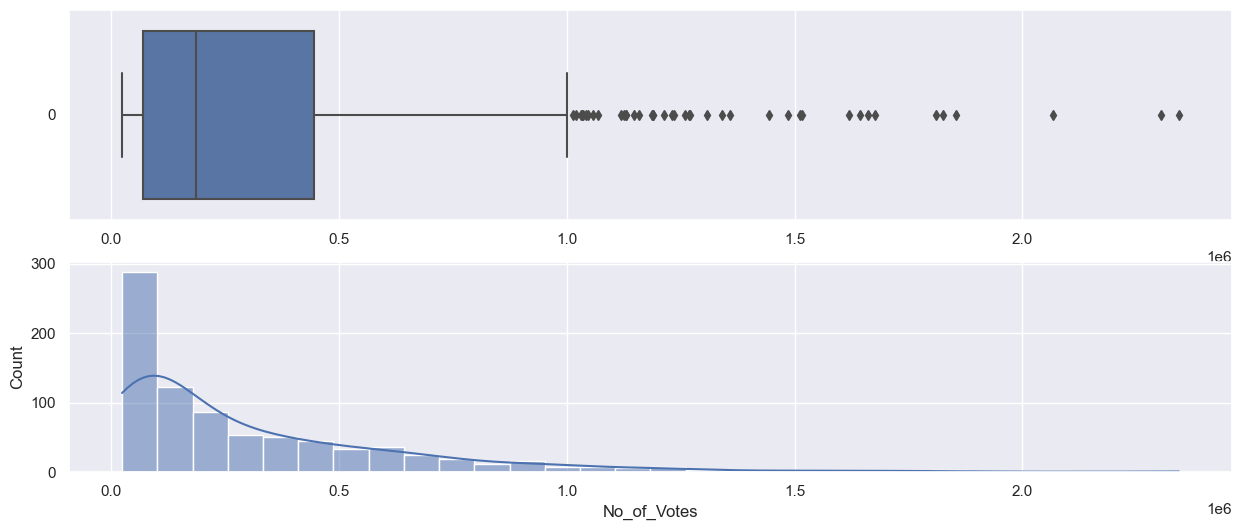

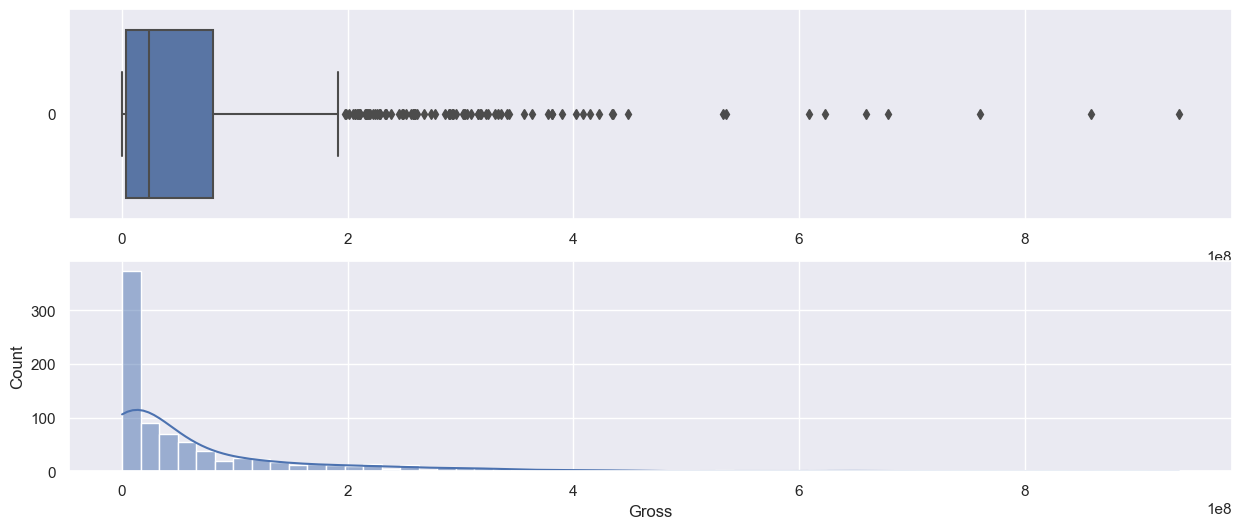

In [11]:
plot=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
for x in plot:
    fig, ax=plt.subplots(2, 1, figsize=(15, 6))
    sb.boxplot(data=data_clean[x], orient='h', ax=ax[0])
    sb.histplot(data=data_clean[x], ax=ax[1], kde=True)
    plt.show()

IMDB Rating, No. of Votes and Gross are all Positive Skew
Metascore is Negative Skew

Now let's see any of the factors correlate to IMDB Rating

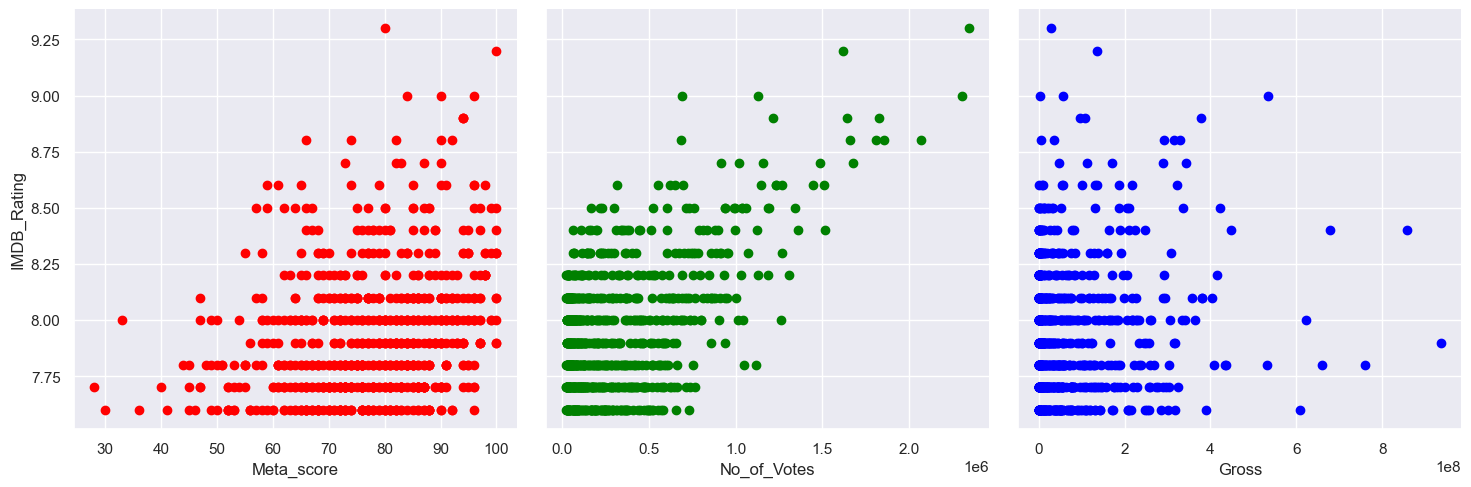

In [12]:
colors = iter(['red', 'green', 'blue', 'purple'])
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
sb.PairGrid(data=data_clean[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']],
            x_vars=['Meta_score', 'No_of_Votes', 'Gross'], y_vars=['IMDB_Rating'],
            height=5).map_offdiag(my_scatter)
plt.show()

Metascore seems to have a low positive correlation with IMDB Rating.

No. of Votes seems to have a better positive correlation with IMDB Rating compared to Metascore.

And it appears Gross have no relation to IMDB Rating at all

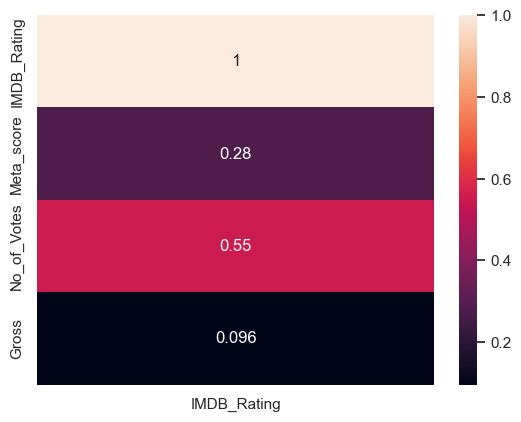

In [13]:
sb.heatmap(data_clean[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
           .corr()[['IMDB_Rating']], annot = True).set
plt.show()

It seems that the heatmap matrix supports our observation. We will be performing multi-variate regression with No_of_Votes and Meta_score.

### Categorical Variables

### Genre
We assume that the first entry in the genre row is the main genre of the repective title

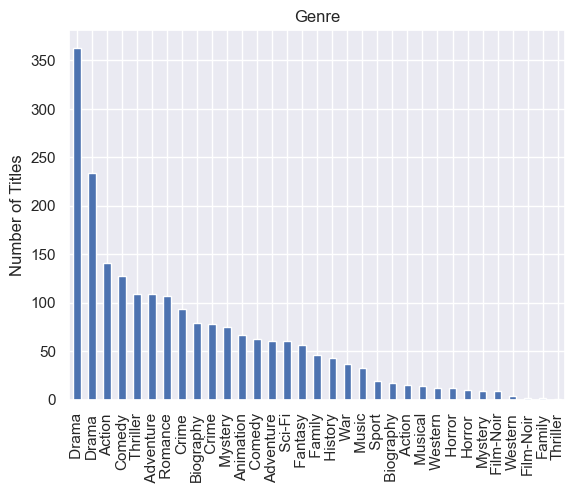

In [14]:
#genr_plt = data_clean['Genre1'].value_counts().plot(kind='bar', title='Main Genre')
#genr_plt.set_ylabel('Number of Titles')
#plt.show()
genr_lst = data_clean['Genre1'].values.tolist() + data_clean['Genre2'].values.tolist() + data_clean['Genre3'].values.tolist()
genr_plt = pd.Series(genr_lst).value_counts().plot(kind='bar', title='Genre')
genr_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Thriller' and 'Family' are the least frequently occurring genres, while 'Drama' is the most frequently occuring genre.

### Director

We will be seeing the top 25 frequent Directors 

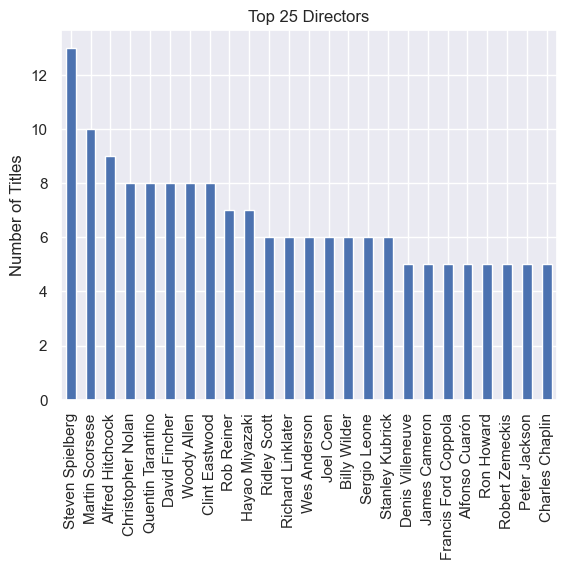

In [15]:
dir_plt = data_clean['Director'].value_counts().head(25).plot(kind='bar', title='Top 25 Directors')
dir_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Steven Spielberg' has released the most movie in IMDB top 1000.

How about actors?

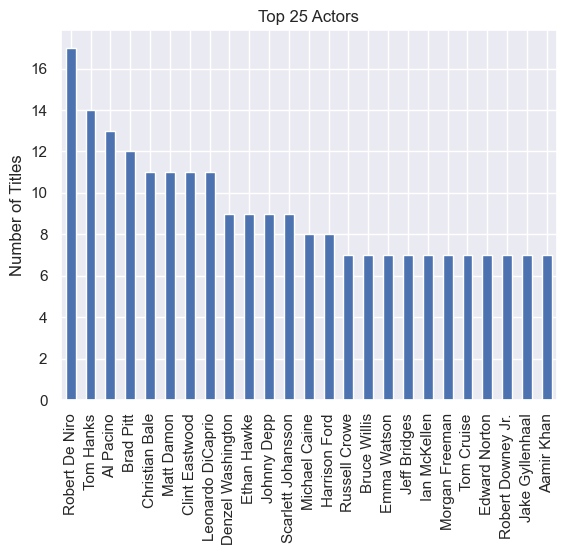

In [16]:
actor_lst = data_clean['Star1'].values.tolist() + data_clean['Star2'].values.tolist() + data_clean['Star3'].values.tolist() + data_clean['Star4'].values.tolist()
actor_plt = pd.Series(actor_lst).value_counts().head(25).plot(kind='bar', title='Top 25 Actors')
actor_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Robert De Niro' has played the most movie in IMDB top 1000, followed by Tom Hanks then Al Pacino